# <u>Project Title</u>
## Crop Production Analysis in India


<u><b>Problem Statement:</b></u>
* The Agriculture business domain, as a vital part of the overall supply chain, is
expected to highly evolve in the upcoming years via the developments, which are
taking place on the side of the Future Internet. This paper presents a novel
Business-to-Business collaboration platform from the agri-food sector perspective,
which aims to facilitate the collaboration of numerous stakeholders belonging to
associated business domains, in an effective and flexible manner.
This dataset provides a huge amount of information on crop production in India
ranging from several years. Based on the Information the ultimate goal would be to
predict crop production and find important insights highlighting key indicators and
metrics that influence crop production.



### ** Load and study the data **

In [98]:
# Load "numpy" and "pandas" for manipulating numbers and data frames
# Load "matplotlib.pyplot" and "seaborn" for data visualisation

import numpy as np
import pandas as pd
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)


In [99]:
# Read in the input file as a Pandas DataFrame

data = pd.read_csv('Crop Production data.csv')

In [100]:
###Dimensions of the dataset is 246091 rows and 7 columns
data.shape #(246091, 7)

(246091, 7)

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


Here, we have 
- four categorical variables - 'State_Name','District_Name', 'Season' and 'Crop type'
- three continuous variables in float - 'Area' and 'Production'
- integer - 'Crop_Year'
format.

In [102]:
data.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [103]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [104]:
data.tail()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0
246090,West Bengal,PURULIA,2014,Winter,Sesamum,175.0,88.0


In [105]:
data.index

RangeIndex(start=0, stop=246091, step=1)

In [106]:
data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [107]:
## Check duplicated in data
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
246086    False
246087    False
246088    False
246089    False
246090    False
Length: 246091, dtype: bool

In [108]:
# drop the duplicated rows
data = data.drop_duplicates() 
data.shape

(246091, 7)

They is no duplicated rows in the data.

###### Checking for Missing Data

In [109]:
data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

'Production' variable shows huge number of missing values - 3730 and no missing values for other variables. 
We can drop missing value samples as we have sufficiently big dataset.

In [110]:
data.shape

(246091, 7)

In [111]:
## Here we remove missing value from the production
data.dropna(subset=["Production"],axis=0,inplace=True)


In [112]:
data.shape                                                   

(242361, 7)

In [113]:
data.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

Now,  there is now missing values.

###### <u>Check outliners</u>

In [114]:
# Select the columns which are of int or float datatype
df_int_float = data.select_dtypes(include=['int64', 'float64'])

# Print the selected dataframe
df_int_float

,Crop_Year,Area,Production
0,2000,1254.0,2000.0
1,2000,2.0,1.0
2,2000,102.0,321.0
3,2000,176.0,641.0
4,2000,720.0,165.0
...,...,...,...
246086,2014,306.0,801.0
246087,2014,627.0,463.0
246088,2014,324.0,16250.0
246089,2014,279151.0,597899.0


<Axes: xlabel='Production'>

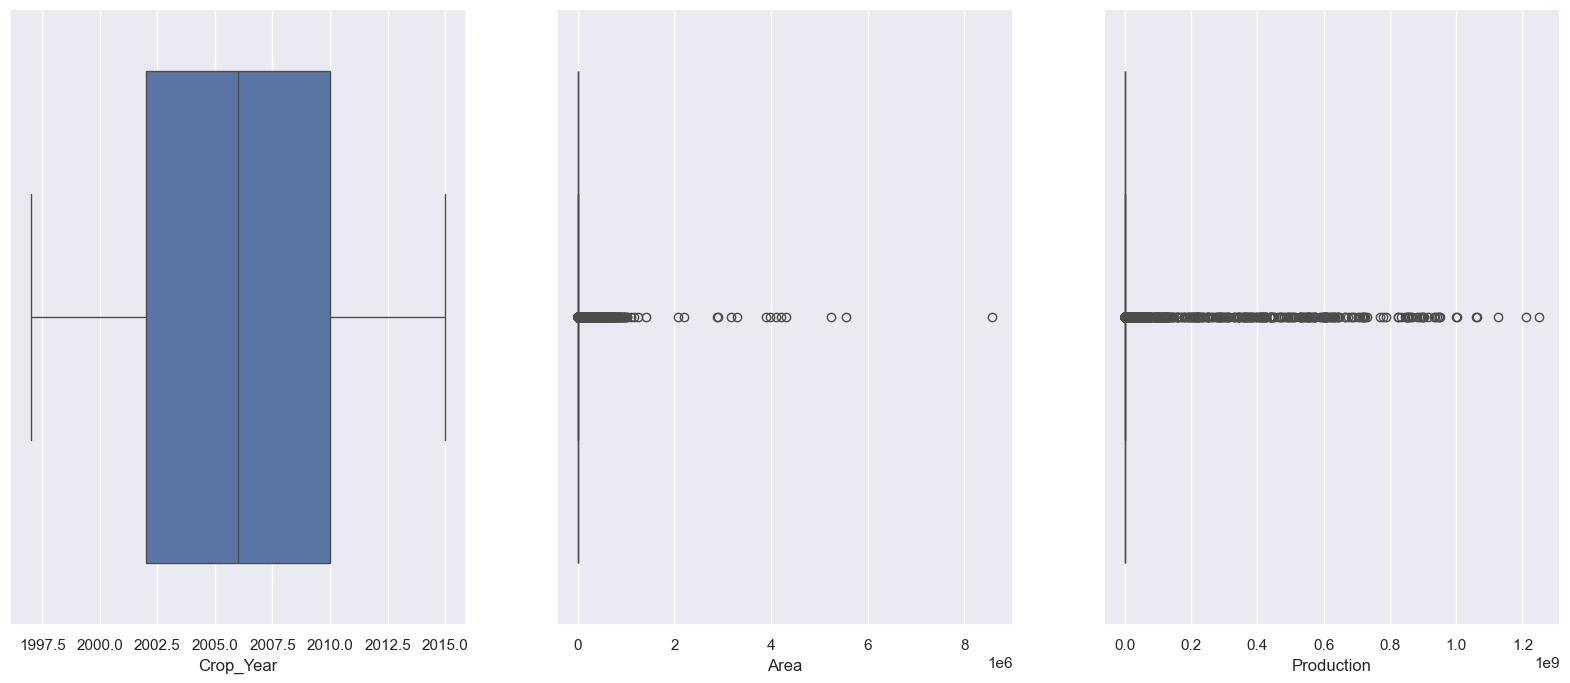

In [115]:
fig, ax = plt.subplots(1,3, figsize=(20, 8))

sns.boxplot(x = data['Crop_Year'], ax = ax[0])
sns.boxplot(x = data['Area'], ax = ax[1])
sns.boxplot(x = data['Production'], ax = ax[2])
# # sns.histplot(data = data ,x = 'fixed acidity', color = 'orange',
# #              edgecolor = 'linen', alpha = 0.7, bins = 5)

Area & Production variables are highly skewed with lot of outliers.

###### Checking for Correlation between variables

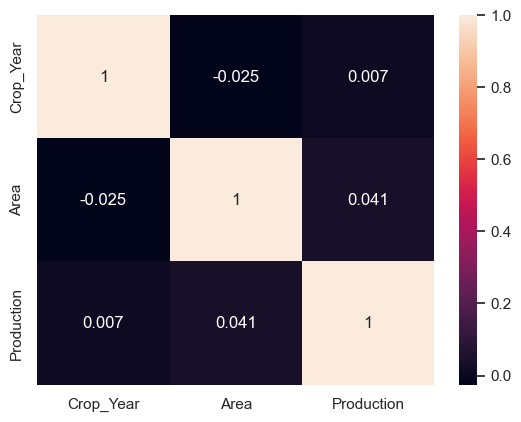

In [116]:
# plt.tick_params(labelsize=10)
sns.heatmap(df_int_float.corr(), annot = True);

###### Analysis Variable 

In [117]:
data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [118]:
data['State_Name'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [119]:
data['District_Name'].value_counts()

District_Name
TUMKUR       931
BELGAUM      924
BIJAPUR      905
HASSAN       895
BELLARY      887
            ... 
HYDERABAD      8
KHUNTI         6
RAMGARH        6
NAMSAI         1
MUMBAI         1
Name: count, Length: 646, dtype: int64

In [120]:
data['District_Name'].unique()

array(['NICOBARS', 'NORTH AND MIDDLE ANDAMAN', 'SOUTH ANDAMANS',
       'ANANTAPUR', 'CHITTOOR', 'EAST GODAVARI', 'GUNTUR', 'KADAPA',
       'KRISHNA', 'KURNOOL', 'PRAKASAM', 'SPSR NELLORE', 'SRIKAKULAM',
       'VISAKHAPATANAM', 'VIZIANAGARAM', 'WEST GODAVARI', 'ANJAW',
       'CHANGLANG', 'DIBANG VALLEY', 'EAST KAMENG', 'EAST SIANG',
       'KURUNG KUMEY', 'LOHIT', 'LONGDING', 'LOWER DIBANG VALLEY',
       'LOWER SUBANSIRI', 'NAMSAI', 'PAPUM PARE', 'TAWANG', 'TIRAP',
       'UPPER SIANG', 'UPPER SUBANSIRI', 'WEST KAMENG', 'WEST SIANG',
       'BAKSA', 'BARPETA', 'BONGAIGAON', 'CACHAR', 'CHIRANG', 'DARRANG',
       'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'DIMA HASAO', 'GOALPARA',
       'GOLAGHAT', 'HAILAKANDI', 'JORHAT', 'KAMRUP', 'KAMRUP METRO',
       'KARBI ANGLONG', 'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MARIGAON',
       'NAGAON', 'NALBARI', 'SIVASAGAR', 'SONITPUR', 'TINSUKIA',
       'UDALGURI', 'ARARIA', 'ARWAL', 'AURANGABAD', 'BANKA', 'BEGUSARAI',
       'BHAGALPUR', 'BHOJPUR', 'B

In [121]:
# print(data['Crop_Year'].value_counts())

data['Crop_Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2010, 1997, 1998, 1999,
       2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015], dtype=int64)

In [122]:
# find unique values and there counts in each column in df using value counts function.

for i in data.columns:
    print ("--------------- %s ----------------" % i)
    print("Value counts:")
    print(data[i].value_counts())
    print ("---Unique_Values---")    
    print(data[i].unique())
    print("\nHighest Value in ", i, "field is ", data[i].max())
    print("Lowest Value in ", i, "field is ", data[i].min())


--------------- State_Name ----------------
Value counts:
State_Name
Uttar Pradesh                  33189
Madhya Pradesh                 22604
Karnataka                      21079
Bihar                          18874
Assam                          14622
Odisha                         13524
Tamil Nadu                     13266
Maharashtra                    12496
Rajasthan                      12066
Chhattisgarh                   10368
West Bengal                     9597
Andhra Pradesh                  9561
Gujarat                         8365
Telangana                       5591
Uttarakhand                     4825
Haryana                         4540
Kerala                          4003
Nagaland                        3904
Punjab                          3143
Meghalaya                       2867
Arunachal Pradesh               2545
Himachal Pradesh                2456
Jammu and Kashmir               1632
Tripura                         1412
Manipur                         1266
Jharkh


Highest Value in  Crop field is  other oilseeds
Lowest Value in  Crop field is  Apple
--------------- Area ----------------
Value counts:
Area
1.0         3573
2.0         3140
100.0       2621
3.0         2478
4.0         2182
            ... 
25569.0        1
19349.0        1
90302.0        1
39698.0        1
279151.0       1
Name: count, Length: 38391, dtype: int64
---Unique_Values---
[1.25400e+03 2.00000e+00 1.02000e+02 ... 3.02274e+05 1.14930e+04
 2.79151e+05]

Highest Value in  Area field is  8580100.0
Lowest Value in  Area field is  0.1
--------------- Production ----------------
Value counts:
Production
1.000000e+00    4028
0.000000e+00    3523
1.000000e+02    3521
2.000000e+00    2964
3.000000e+00    2311
                ... 
2.120000e+08       1
1.070000e+00       1
2.293410e+05       1
1.870600e+04       1
5.978990e+05       1
Name: count, Length: 51627, dtype: int64
---Unique_Values---
[2.00000e+03 1.00000e+00 3.21000e+02 ... 7.29553e+05 7.30136e+05
 5.97899e+05]

Highest 

######  State name wise production of crop

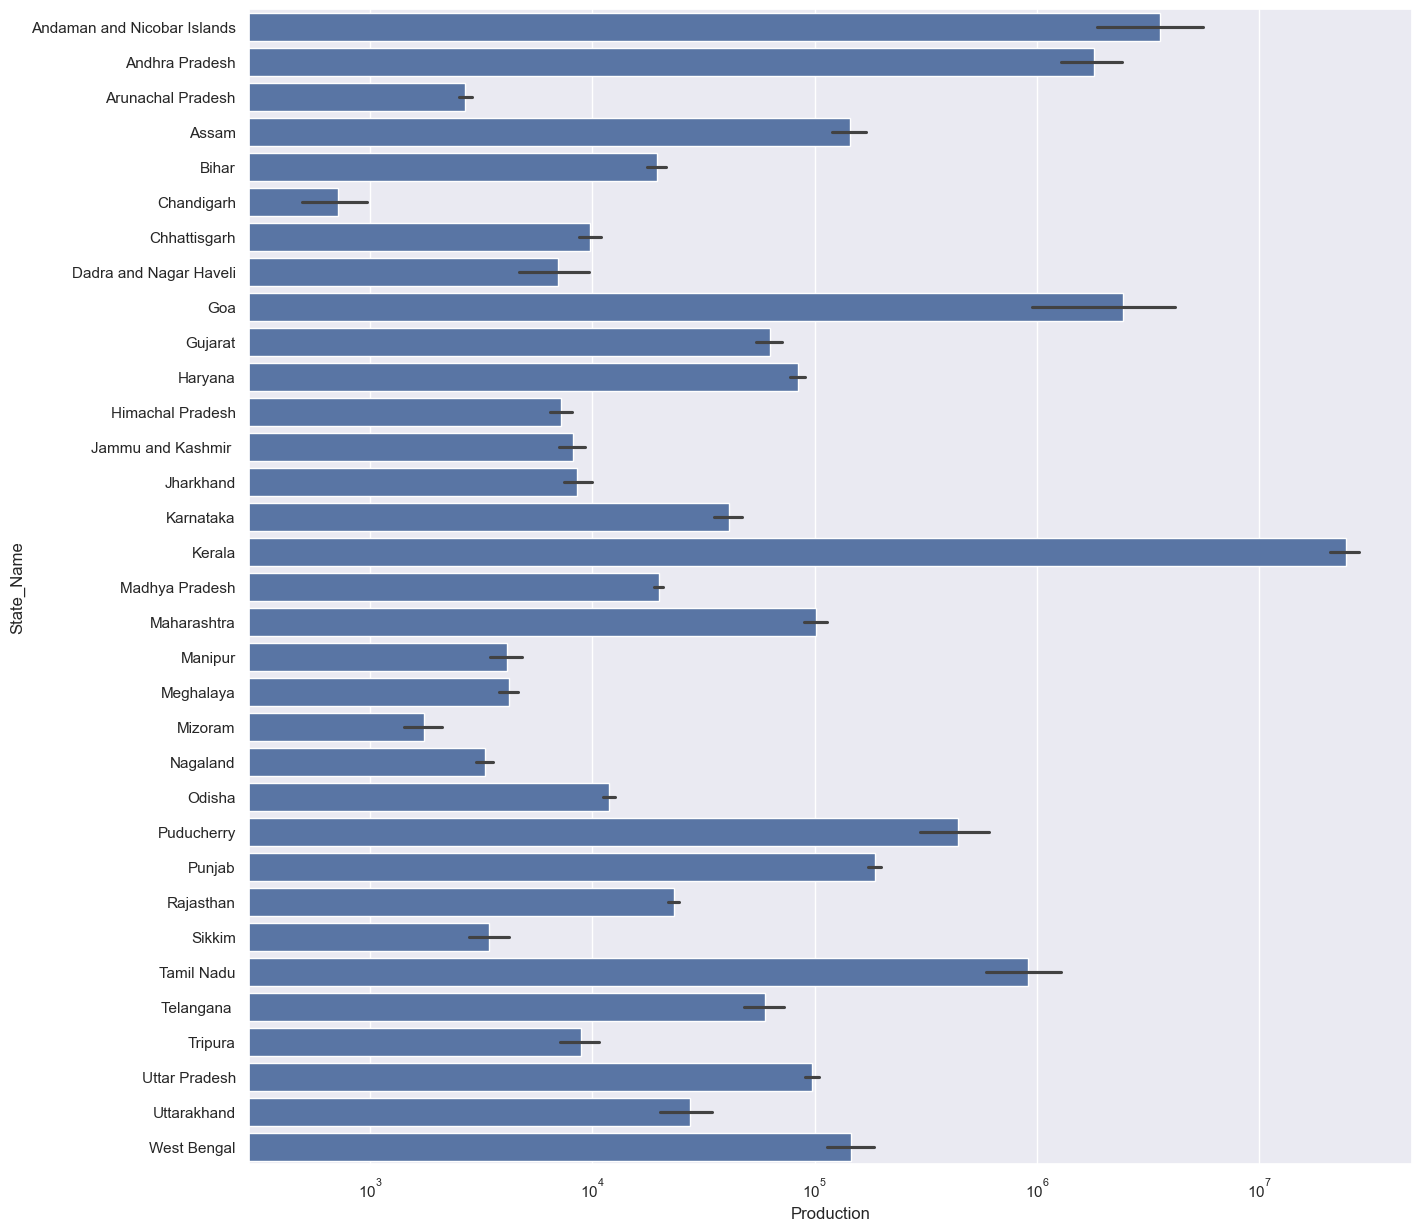

In [123]:
plt.figure(figsize= (15,15))
sns.barplot(x=data['Production'],y= data["State_Name"])#, orient='h')
plt.xscale('log')

Here, we can clearly see the Kerala has highest production value.

###### Season vs Crop plot 

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Kharif     '),
  Text(1, 0, 'Whole Year '),
  Text(2, 0, 'Autumn     '),
  Text(3, 0, 'Rabi       '),
  Text(4, 0, 'Summer     '),
  Text(5, 0, 'Winter     ')])

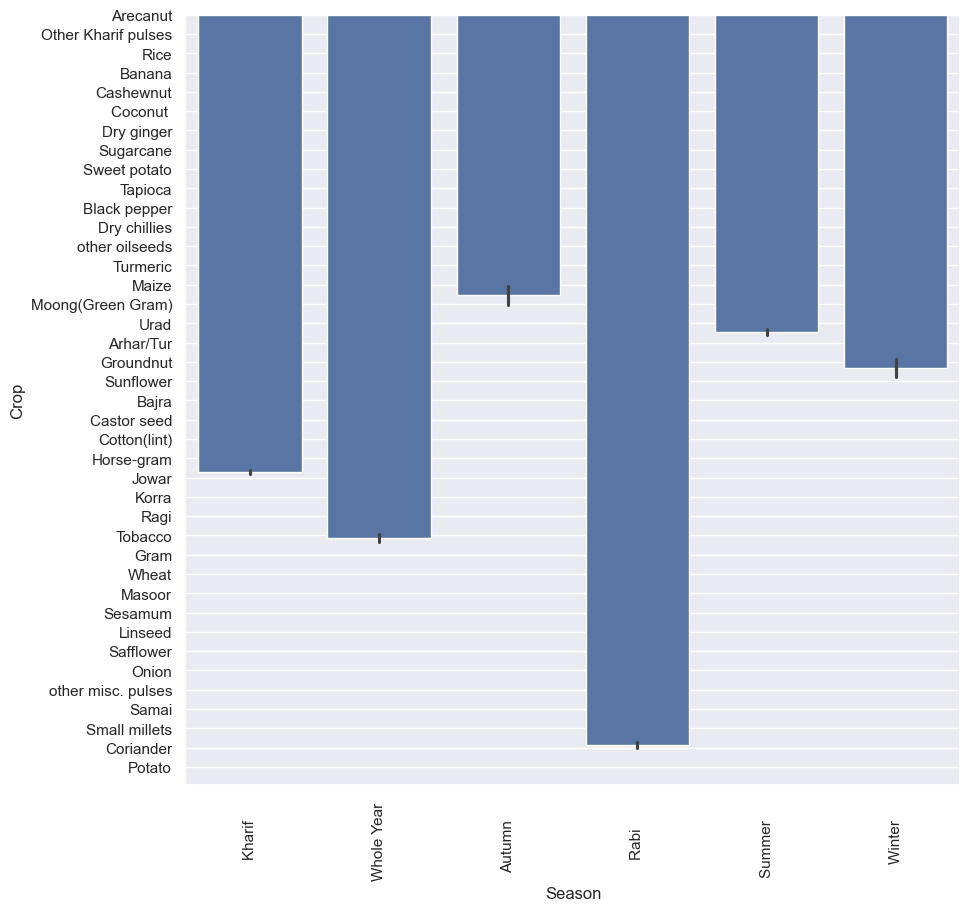

In [124]:
plt.figure(figsize= (10,10))
# sns.barplot(x=data['Production'],y= data["Area"], orient='h')
sns.barplot(x = data['Season'], y = data['Crop'])
plt.xticks(rotation=90)

From the above graph, Rabi season has more crop compared to other season.

Text(0.5, 1.0, 'Season - Production: Total')

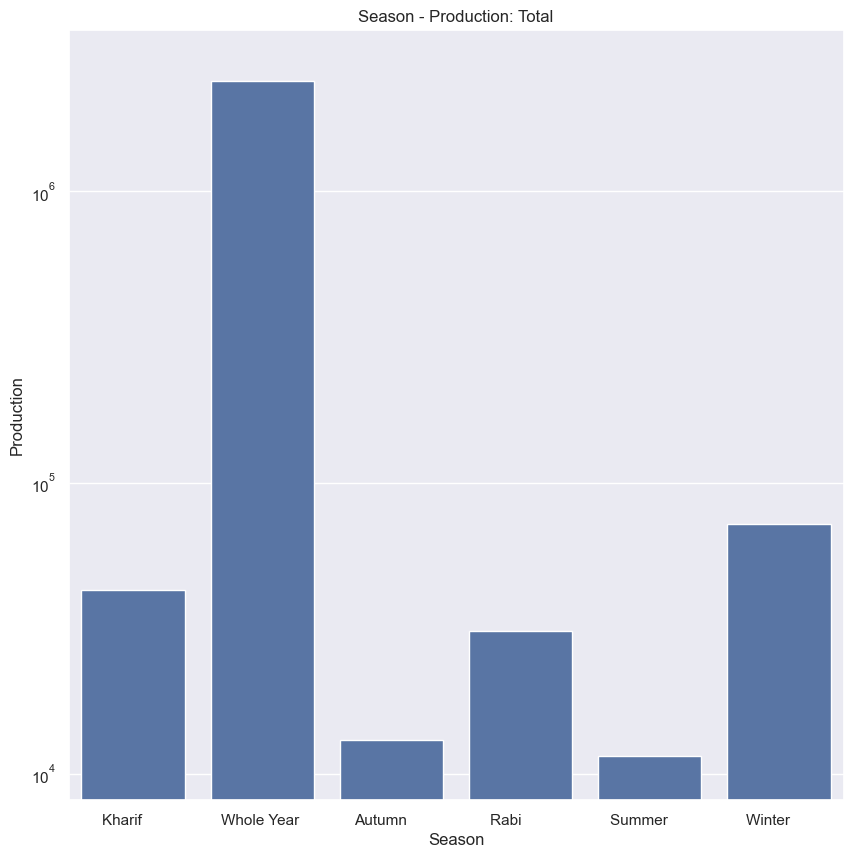

In [125]:
plt.figure(figsize= (10,10))
sns.barplot(x = data['Season'], y = data['Production'], err_kws={'linewidth': 0})#, hue = data['Crop_Year'])
plt.yscale('log')
plt.title('Season - Production: Total')

Text(0.5, 1.0, 'Area - Production: Total')

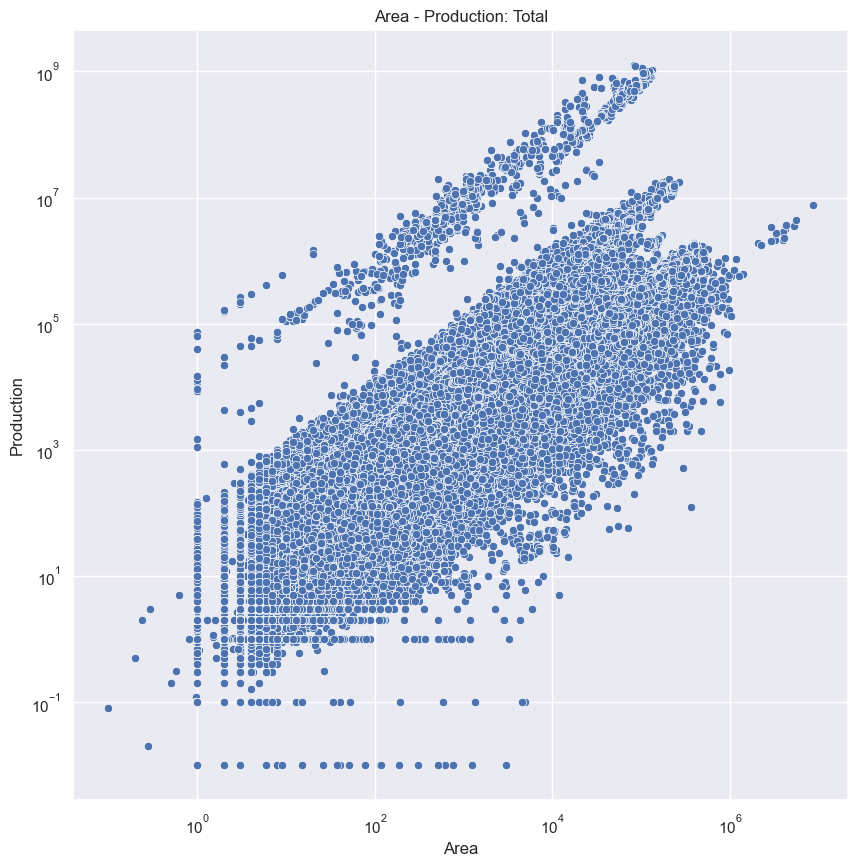

In [126]:
plt.figure(figsize= (10,10))
sns.scatterplot(x = data['Area'], y = data['Production'])
plt.yscale('log')
plt.xscale('log')
plt.title('Area - Production: Total')

###### crop production thourgh out years

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, '1997'),
  Text(1, 0, '1998'),
  Text(2, 0, '1999'),
  Text(3, 0, '2000'),
  Text(4, 0, '2001'),
  Text(5, 0, '2002'),
  Text(6, 0, '2003'),
  Text(7, 0, '2004'),
  Text(8, 0, '2005'),
  Text(9, 0, '2006'),
  Text(10, 0, '2007'),
  Text(11, 0, '2008'),
  Text(12, 0, '2009'),
  Text(13, 0, '2010'),
  Text(14, 0, '2011'),
  Text(15, 0, '2012'),
  Text(16, 0, '2013'),
  Text(17, 0, '2014'),
  Text(18, 0, '2015')])

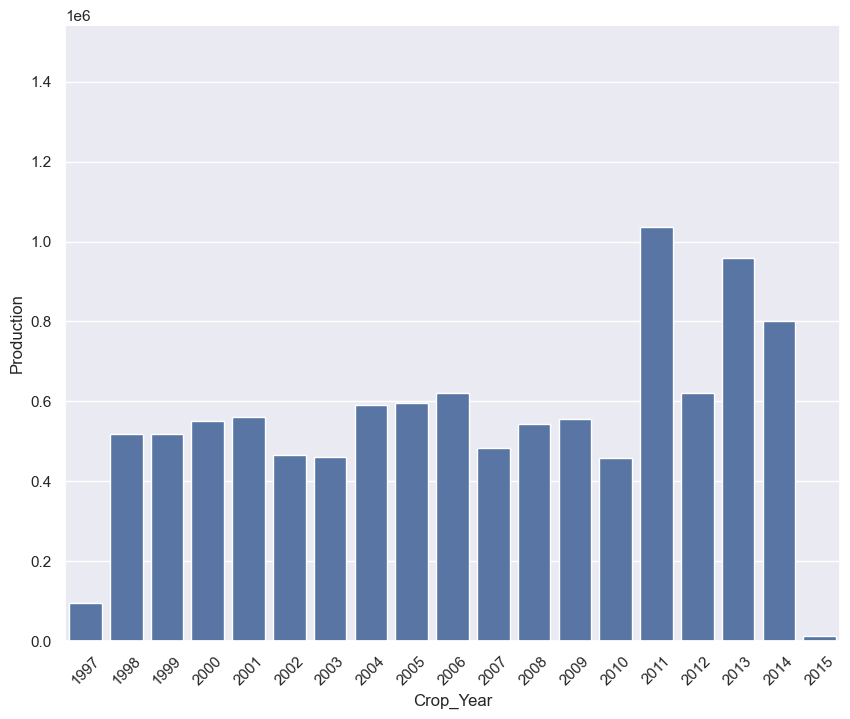

In [127]:
plt.figure(figsize= (10,8))
sns.barplot(x=data['Crop_Year'],y= data["Production"], err_kws={'linewidth': 0})
plt.xticks(rotation=45)


From this we can see that Year 2011,2013 and 2014 had highest production of crops

In [128]:
State_Un = data["State_Name"].unique()
State_Un

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

From analysis we can see that the "State_name" can be grouped based on the different zones, also "Crop" can also be divided based on the type of crop.
Thus we can create new variables, also we can divide the dataframe based on "State_Name"

##### State wise analysis

In [129]:
#Zone-Wise Production
North_India = ['Rajasthan','Punjab', 'Himachal Pradesh', 'Haryana']
East_India = ['Bihar', 'Odisha', 'Jharkhand', 'West Bengal']
South_India = ['Andhra Pradesh', 'Karnataka', 'Kerala' ,'Tamil Nadu', 'Telangana']
West_India = ['Gujarat','Goa','Maharashtra']
Central_India = ['Madhya Pradesh', 'Chhattisgarh', 'Uttar Pradesh', 'Uttarakhand']
North_East_India = ['Assam', 'Sikkim', 'Nagaland', 'Meghalaya', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh']
UT_India = ['Andaman and Nicobar Islands', 'Dadra and Nagar Haveli', 'Puducherry', 'Chandigarh','Jammu and Kashmir']


In [130]:
def get_zonal_names(data):
    if data['State_Name'].strip() in North_India:
        val = 'North Zone'
    elif data['State_Name'].strip()  in South_India:
        val = 'South Zone'
    elif data['State_Name'].strip()  in East_India:
        val = 'East Zone'
    elif data['State_Name'].strip()  in West_India:
        val = 'West Zone'
    elif data['State_Name'].strip()  in Central_India:
        val = 'Central Zone'
    elif data['State_Name'].strip()  in North_East_India:
        val = 'North East Zone'
    elif data['State_Name'].strip()  in UT_India:
        val = 'Union Terr'
    else:
        val = 'No Value'
    return val

data['Zones'] = data.apply(get_zonal_names, axis=1)
data['Zones'].unique()

array(['Union Terr', 'South Zone', 'North East Zone', 'East Zone',
       'Central Zone', 'West Zone', 'North Zone'], dtype=object)

<Axes: ylabel='Zones'>

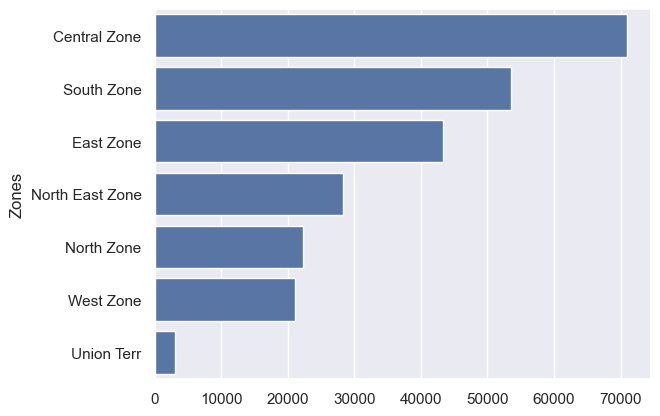

In [131]:
data['Zones'].value_counts()
sns.barplot(x = data['Zones'].value_counts().values, y = data['Zones'].value_counts().index)

In [132]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,Union Terr
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,Union Terr
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,Union Terr
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,Union Terr
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,Union Terr


In [133]:
zone_df = data.groupby(by='Zones')['Production'].sum().reset_index().sort_values(by='Production', ascending = False)
zone_df

,Zones,Production
4,South Zone,1.284797e+11
0,Central Zone,3.916463e+09
6,West Zone,2.293688e+09
2,North East Zone,2.165305e+09
1,East Zone,1.936070e+09
3,North Zone,1.266784e+09
5,Union Terr,1.118151e+09


###### zonal based production details

Text(0.5, 1.0, 'Zone - Production: Total')

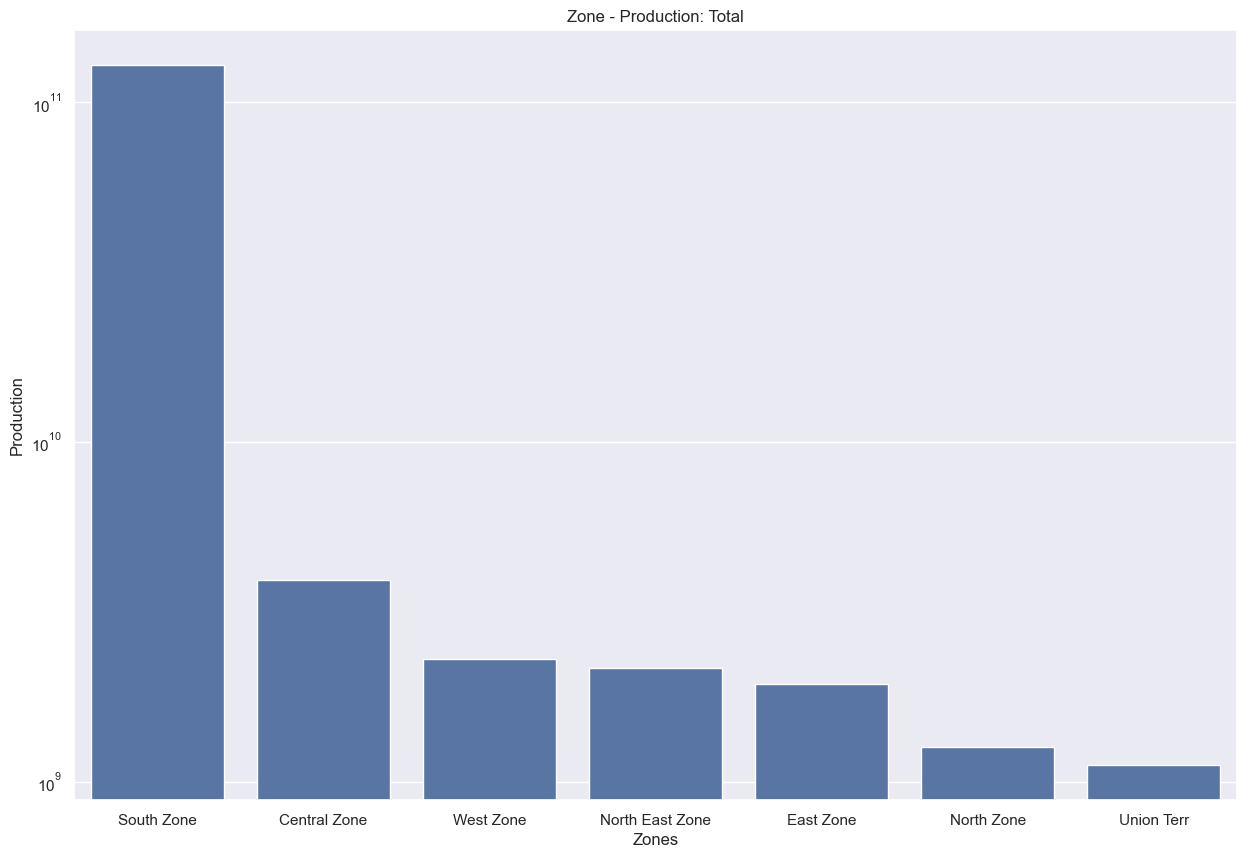

In [134]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x = zone_df['Zones'] ,y= zone_df["Production"])#, orient='h')
plt.yscale('log')
plt.title('Zone - Production: Total')
# plt.xticks(rotation=45)

From the plot we can see South zone shows high production

Text(0.5, 1.0, 'South Zone - Production: Total')

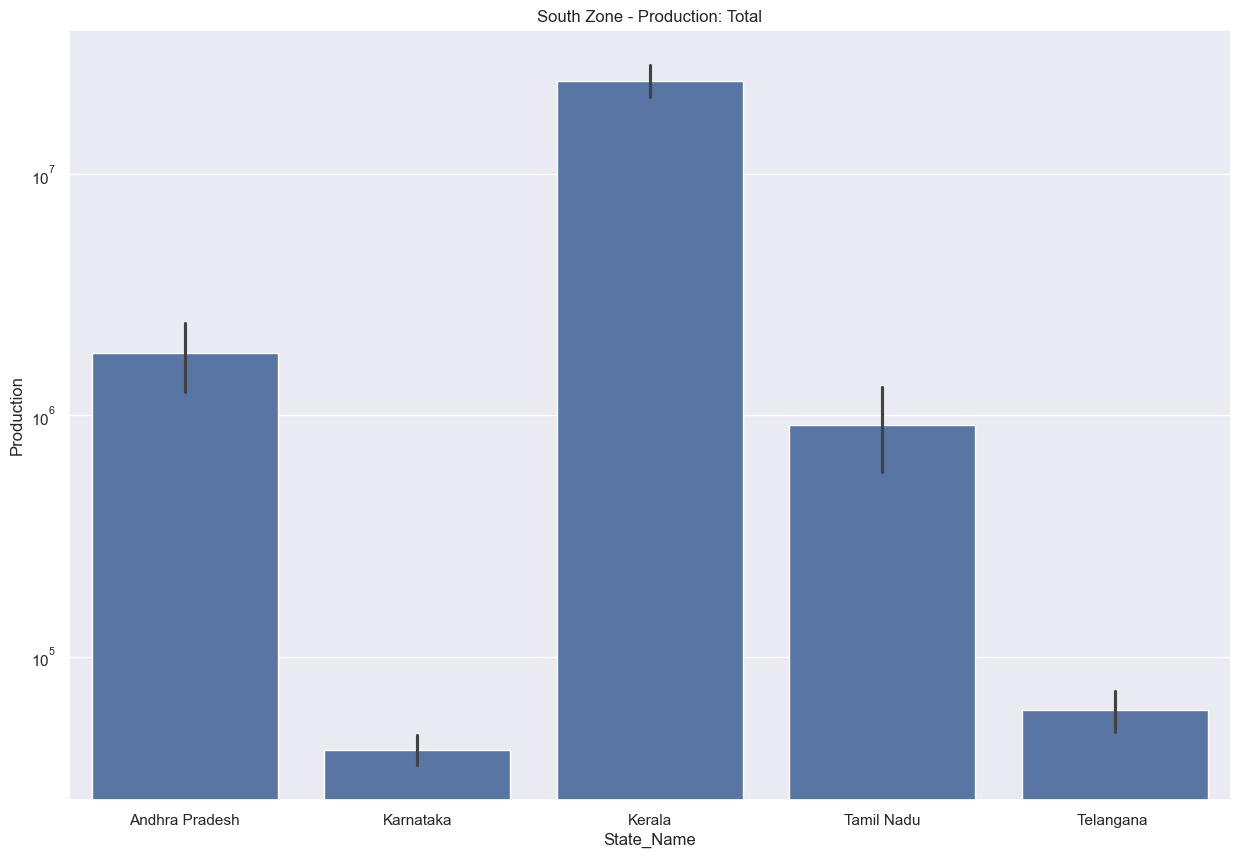

In [135]:
fig, ax = plt.subplots(figsize=(15,10))
south_zone = data[(data['Zones'] == 'South Zone')]
sns.barplot(x = south_zone['State_Name'] ,y= data["Production"])#, orient='h')
plt.yscale('log')
plt.title('South Zone - Production: Total')
# plt.xticks(rotation=45)

Here, we have extracedt details of south zone, Similarly we can access each zone separatly.

##### Crop variable analysis

Similarly, we can create new field based on 'Crop' type.

In [136]:
crop=data['Crop']
def cat_crop(crop):
    for i in ['Rice','Maize','Wheat','Barley','Varagu','Other Cereals & Millets','Ragi','Small millets','Bajra','Jowar', 'Paddy','Total foodgrain','Jobster']:
        if crop==i:
            return 'Cereal'
    for i in ['Moong','Urad','Arhar/Tur','Peas & beans','Masoor',
              'Other Kharif pulses','other misc. pulses','Ricebean (nagadal)',
              'Rajmash Kholar','Lentil','Samai','Blackgram','Korra','Cowpea(Lobia)',
              'Other  Rabi pulses','Other Kharif pulses','Peas & beans (Pulses)','Pulses total','Gram']:
        if crop==i:
            return 'Pulses'
    for i in ['Peach','Apple','Litchi','Pear','Plums','Ber','Sapota','Lemon','Pome Granet',
               'Other Citrus Fruit','Water Melon','Jack Fruit','Grapes','Pineapple','Orange',
               'Pome Fruit','Citrus Fruit','Other Fresh Fruits','Mango','Papaya','Coconut','Banana']:
        if crop==i:
            return 'Fruits'
    for i in ['Bean','Lab-Lab','Moth','Guar seed','Soyabean','Horse-gram']:
        if crop==i:
            return 'Beans'
    for i in ['Turnip','Peas','Beet Root','Carrot','Yam','Ribed Guard','Ash Gourd ','Pump Kin','Redish','Snak Guard','Bottle Gourd',
              'Bitter Gourd','Cucumber','Drum Stick','Cauliflower','Beans & Mutter(Vegetable)','Cabbage',
              'Bhindi','Tomato','Brinjal','Khesari','Sweet potato','Potato','Onion','Tapioca','Colocosia']:
              if crop==i:
                return 'Vegetables'
    for i in ['Perilla','Ginger','Cardamom','Black pepper','Dry ginger','Garlic','Coriander','Turmeric','Dry chillies','Cond-spcs other']:
        if crop==i:
            return 'spices'
    for i in ['other fibres','Kapas','Jute & mesta','Jute','Mesta','Cotton(lint)','Sannhamp']:
        if crop==i:
            return 'fibres'
    for i in ['Arcanut (Processed)','Atcanut (Raw)','Cashewnut Processed','Cashewnut Raw','Cashewnut','Arecanut','Groundnut']:
        if crop==i:
            return 'Nuts'
    for i in ['other oilseeds','Safflower','Niger seed','Castor seed','Linseed','Sunflower','Rapeseed &Mustard','Sesamum','Oilseeds total']:
        if crop==i:
            return 'oilseeds'
    for i in ['Tobacco','Coffee','Tea','Sugarcane','Rubber']:
        if crop==i:
            return 'Commercial'

data['Crop_type']=data['Crop'].apply(cat_crop)

###### Crop wise Production plot describing production values for all crop types.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Cereal'),
  Text(1, 0, 'Pulses'),
  Text(2, 0, 'oilseeds'),
  Text(3, 0, 'Vegetables'),
  Text(4, 0, 'spices'),
  Text(5, 0, 'Nuts'),
  Text(6, 0, 'Commercial'),
  Text(7, 0, 'fibres'),
  Text(8, 0, 'Beans'),
  Text(9, 0, 'Fruits')])

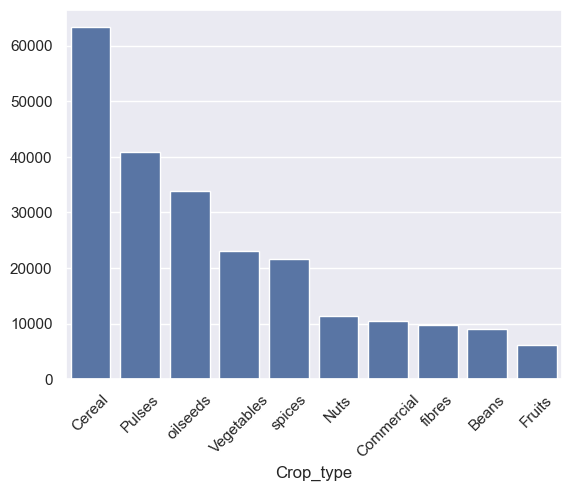

In [137]:
crop_df = data['Crop_type'].value_counts()
sns.barplot(y = crop_df.values, x = crop_df.index)
plt.xticks(rotation=45)

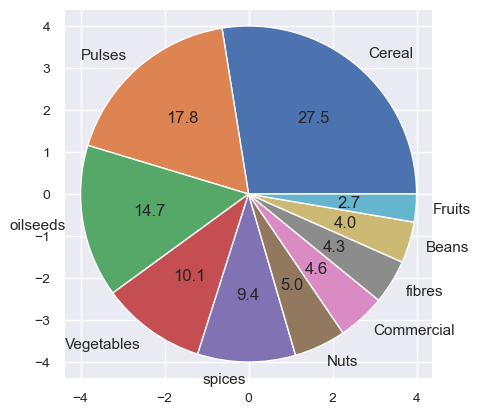

In [138]:

fig, ax = plt.subplots()
plt.pie(crop_df, radius=4,  autopct="%1.1f", labels= crop_df.index,  pctdistance=0.6, 
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)
plt.tick_params(labelsize=10)

In [139]:
crop_type_df = data.groupby(by='Crop_type')['Production'].sum().reset_index().sort_values(by='Production', ascending = False)
crop_type_df

,Crop_type,Production
2,Commercial,5.547619e+09
1,Cereal,3.594987e+09
6,Vegetables,6.230645e+08
7,fibres,4.914495e+08
5,Pulses,2.084907e+08
8,oilseeds,1.864416e+08
3,Fruits,1.717526e+08
0,Beans,1.624564e+08
4,Nuts,1.359093e+08
9,spices,5.305029e+07


Text(0.5, 1.0, 'Crop_Type - Production: Total')

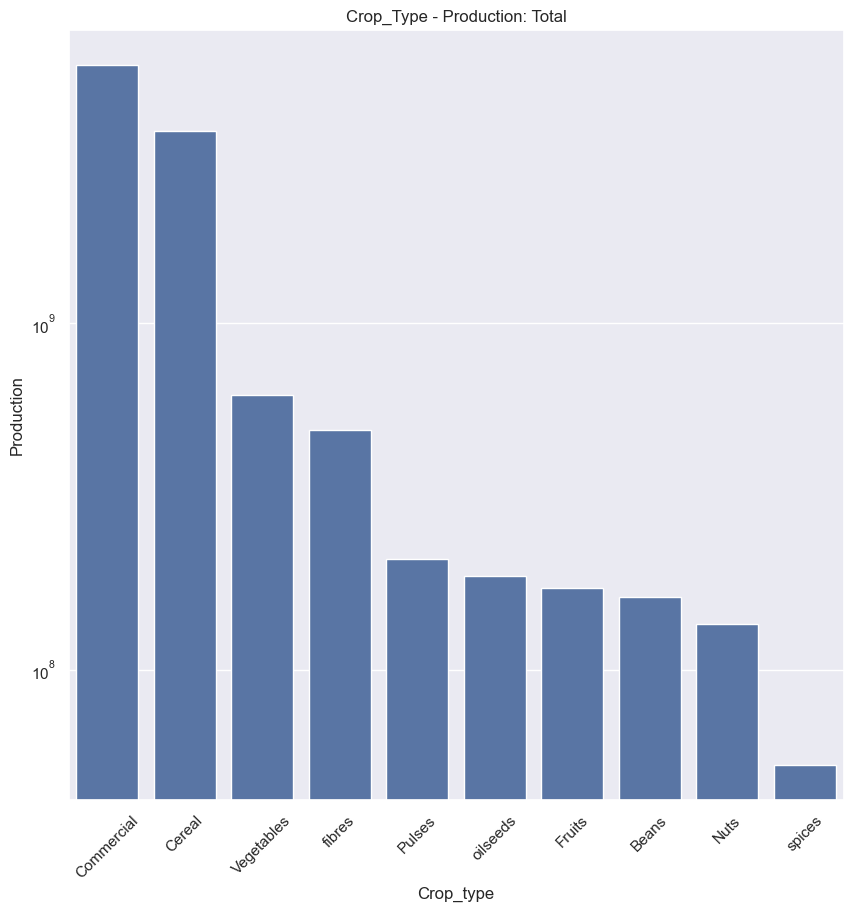

In [140]:
plt.figure(figsize= (10,10))
sns.barplot(x=crop_type_df['Crop_type'],y= crop_type_df["Production"])
plt.yscale('log')
plt.xticks(rotation=45)
plt.title('Crop_Type - Production: Total')

In [141]:
Crop_name = data[data['Crop_type'] == 'Commercial']
Crop_name

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,Crop_type
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.00,Union Terr,Commercial
16,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Sugarcane,1.0,1.00,Union Terr,Commercial
26,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Sugarcane,5.0,40.00,Union Terr,Commercial
60,Andaman and Nicobar Islands,NICOBARS,2006,Whole Year,Sugarcane,0.2,0.50,Union Terr,Commercial
65,Andaman and Nicobar Islands,NICOBARS,2010,Autumn,Sugarcane,13.4,41.75,Union Terr,Commercial
...,...,...,...,...,...,...,...,...,...
245953,West Bengal,PURULIA,2010,Whole Year,Sugarcane,303.0,11541.00,East Zone,Commercial
245984,West Bengal,PURULIA,2011,Whole Year,Sugarcane,303.0,20264.00,East Zone,Commercial
246016,West Bengal,PURULIA,2012,Whole Year,Sugarcane,314.0,11199.00,East Zone,Commercial
246051,West Bengal,PURULIA,2013,Whole Year,Sugarcane,161.0,7948.00,East Zone,Commercial


Text(0.5, 1.0, 'Commercial Crop - Production: Total')

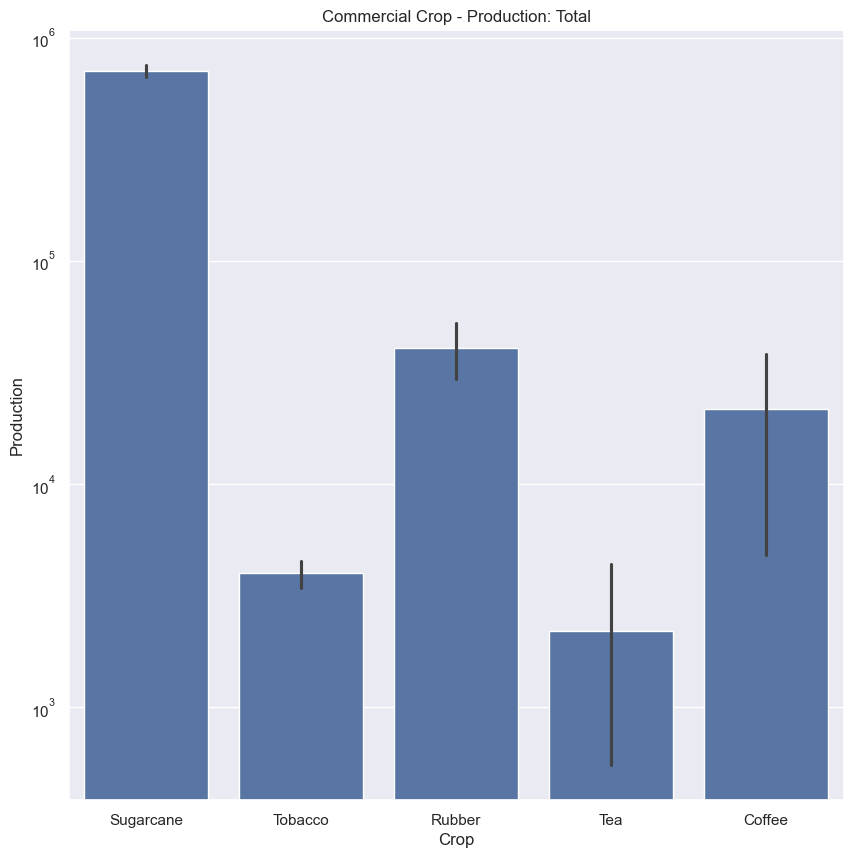

In [142]:

plt.figure(figsize= (10,10))
sns.barplot(x=Crop_name['Crop'],y= data["Production"])#, orient='h')
plt.yscale('log')
# plt.xticks(rotation=45)
plt.title('Commercial Crop - Production: Total')

###### Production based on season

In [143]:
#Season vs Production
df_season=data.copy()
season = df_season.groupby(by='Season')['Production'].sum().reset_index().sort_values(by='Production').head(10)
season


,Season,Production
0,Autumn,6.441377e+07
3,Summer,1.706579e+08
5,Winter,4.345498e+08
2,Rabi,2.051688e+09
1,Kharif,4.029970e+09
4,Whole Year,1.344248e+11


Text(0.5, 1.0, 'Seasonal Crops vs Production')

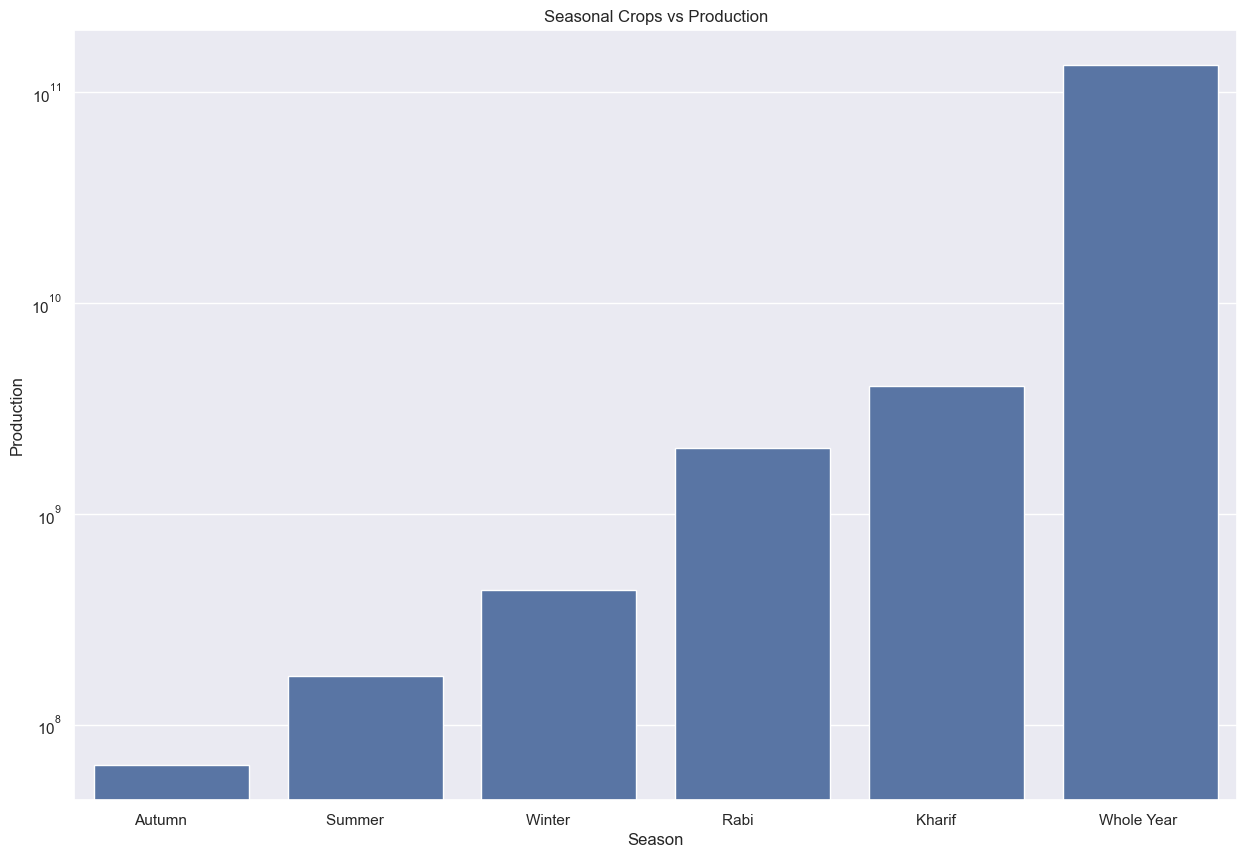

In [144]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x= season['Season'], y = season['Production'], err_kws={'linewidth': 0})
plt.yscale('log')
plt.title('Seasonal Crops vs Production')

###### Scatter plot between State name and Crop type based on season

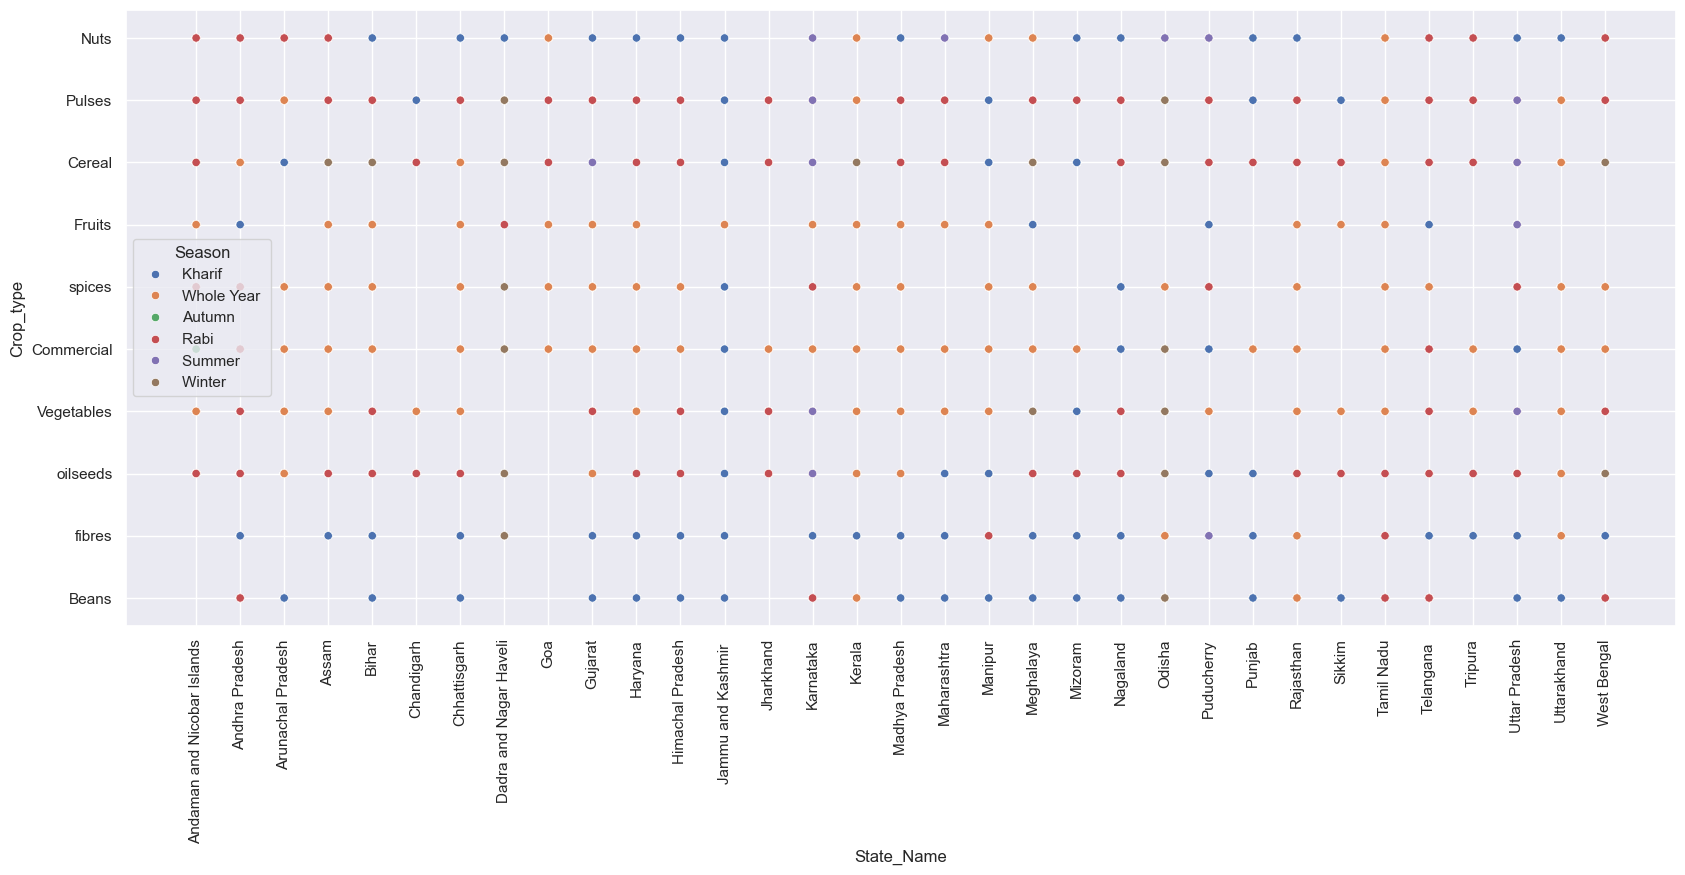

In [145]:
plt.figure(figsize=(20,8))
sns.scatterplot(x=data["State_Name"],y=data["Crop_type"],hue=data["Season"])
plt.xticks(rotation=90)
plt.show()

In [146]:
dff = pd.crosstab(data['State_Name'], data['Crop_type'])
dff

Crop_type,Beans,Cereal,Commercial,Fruits,Nuts,Pulses,Vegetables,fibres,oilseeds,spices
State_Name,,,,,,,,,,
Andaman and Nicobar Islands,0,20,15,16,37,9,20,0,11,52
Andhra Pradesh,386,2264,474,502,674,1336,1046,333,1101,802
Arunachal Pradesh,26,1021,168,0,26,67,257,0,343,637
Assam,0,2952,854,920,400,2234,1781,1284,2097,1338
Bihar,280,6108,756,226,130,3731,1775,924,2504,1396
Chandigarh,0,39,0,0,0,14,26,0,7,0
Chhattisgarh,646,1805,316,264,261,2087,1143,535,1496,1288
Dadra and Nagar Haveli,0,116,12,9,9,64,0,13,30,1
Goa,0,62,22,16,47,32,0,0,0,12


In [147]:
zoneCrop = pd.crosstab(data['Zones'], data['Crop_type'])
zoneCrop

Crop_type,Beans,Cereal,Commercial,Fruits,Nuts,Pulses,Vegetables,fibres,oilseeds,spices
Zones,,,,,,,,,,
Central Zone,3080,18062,3010,1192,2063,13865,8126,2182,9431,6963
East Zone,1163,12771,1735,226,2016,7428,3550,1918,6505,3000
North East Zone,495,6645,1607,1318,851,4466,3210,1954,3914,2774
North Zone,1262,5910,1060,309,699,4292,1725,1152,2988,1849
South Zone,2223,12423,2198,2730,4094,6473,5688,1697,6413,6271
Union Terr,12,935,99,122,151,495,326,90,332,257
West Zone,880,6537,852,256,1598,3879,529,792,4218,524


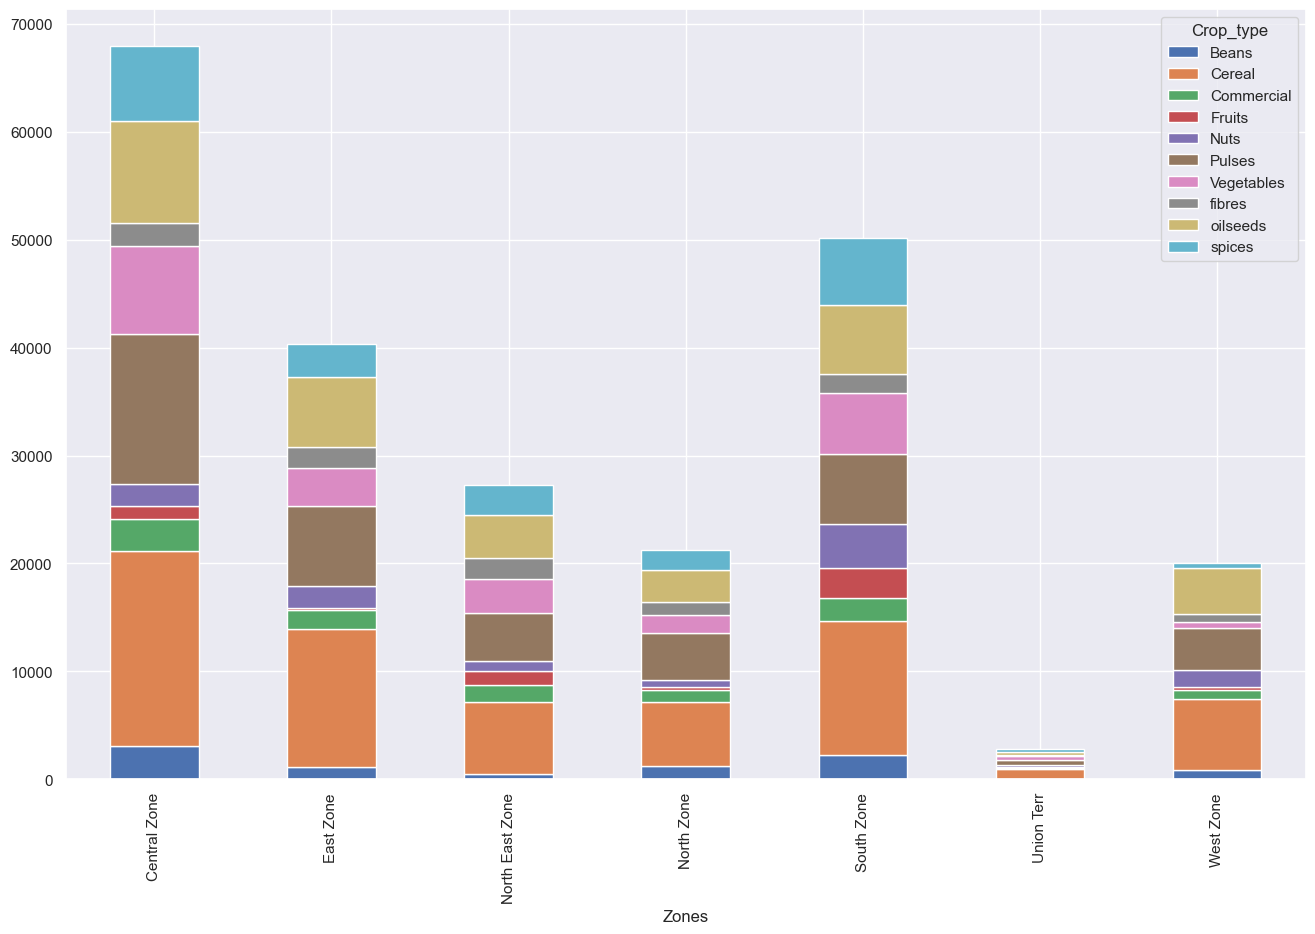

In [148]:
zoneCrop.plot(kind='bar', stacked=True, figsize = (16,10));

In [149]:
zoneSea = pd.crosstab(data['Zones'], data['Season'])
zoneSea

Season,Autumn,Kharif,Rabi,Summer,Whole Year,Winter
Zones,,,,,,
Central Zone,0,30308,22187,4113,14378,0
East Zone,3982,10429,11909,5314,6606,5021
North East Zone,708,10739,7411,601,8121,704
North Zone,0,10474,6376,0,5355,0
South Zone,221,19536,11884,2730,18884,245
Union Terr,12,1315,952,157,541,80
West Zone,7,11482,5441,1896,2242,0


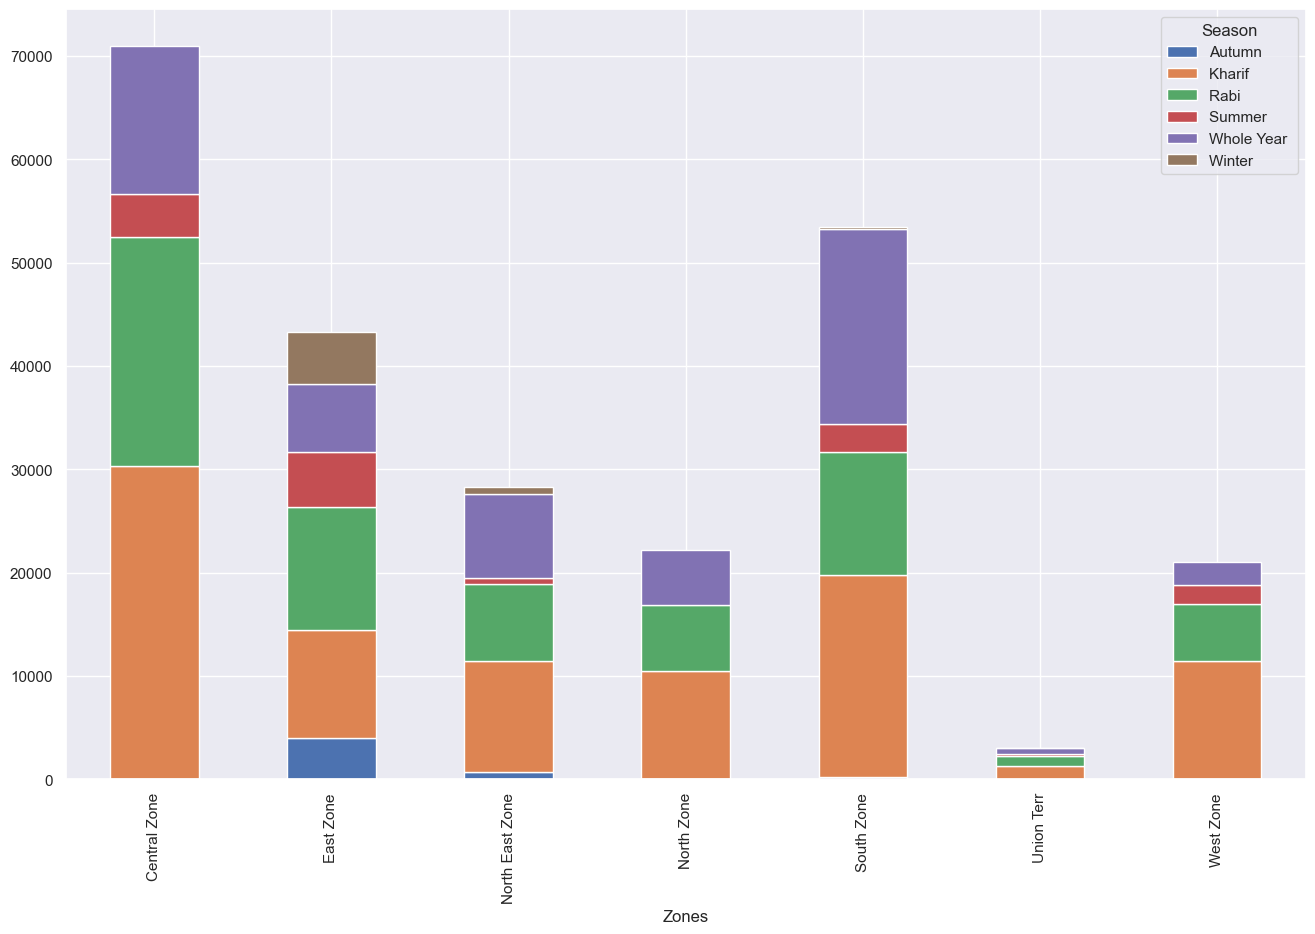

In [150]:
zoneSea.plot(kind='bar', stacked=True, figsize = (16,10));

From the all data analysis we can find the production of a crop in different state within different zone.

###### Zonal representaion of the production

In [151]:
south_zone = data[(data['Zones'] == 'South Zone')]
south_zone

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,Crop_type
203,Andhra Pradesh,ANANTAPUR,1997,Kharif,Arhar/Tur,21400.0,2600.0,South Zone,Pulses
204,Andhra Pradesh,ANANTAPUR,1997,Kharif,Bajra,1400.0,500.0,South Zone,Cereal
205,Andhra Pradesh,ANANTAPUR,1997,Kharif,Castor seed,1000.0,100.0,South Zone,oilseeds
206,Andhra Pradesh,ANANTAPUR,1997,Kharif,Cotton(lint),7300.0,9400.0,South Zone,fibres
207,Andhra Pradesh,ANANTAPUR,1997,Kharif,Dry chillies,3700.0,7100.0,South Zone,spices
...,...,...,...,...,...,...,...,...,...
196859,Telangana,WARANGAL,2014,Rabi,Sunflower,21.0,30.0,South Zone,oilseeds
196860,Telangana,WARANGAL,2014,Rabi,Sweet potato,42.0,326.0,South Zone,Vegetables
196861,Telangana,WARANGAL,2014,Rabi,Tobacco,70.0,137.0,South Zone,Commercial
196862,Telangana,WARANGAL,2014,Rabi,Urad,1494.0,607.0,South Zone,Pulses


In [152]:
dfs = south_zone.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)
dfs

,State_Name,Production
2,Kerala,9.788005e+10
0,Andhra Pradesh,1.732459e+10
3,Tamil Nadu,1.207644e+10
1,Karnataka,8.634298e+08
4,Telangana,3.351479e+08


Text(0.5, 1.0, 'South Zone : State_ name vs Production')

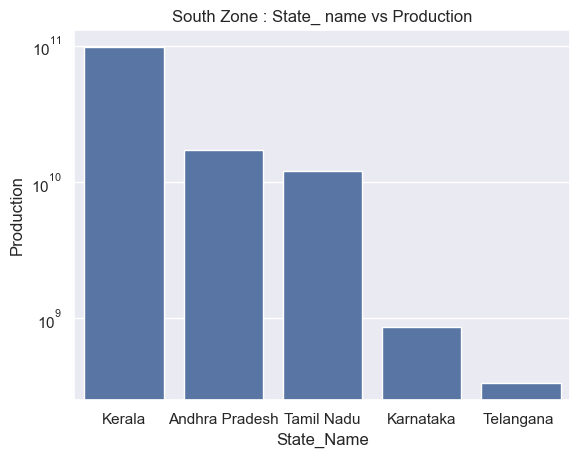

In [153]:
sns.barplot(x = dfs['State_Name'] ,y= dfs["Production"])#, orient='h')
plt.yscale('log')
plt.title('South Zone : State_ name vs Production')

Text(0.5, 1.0, 'South Zone : season - Production: Total')

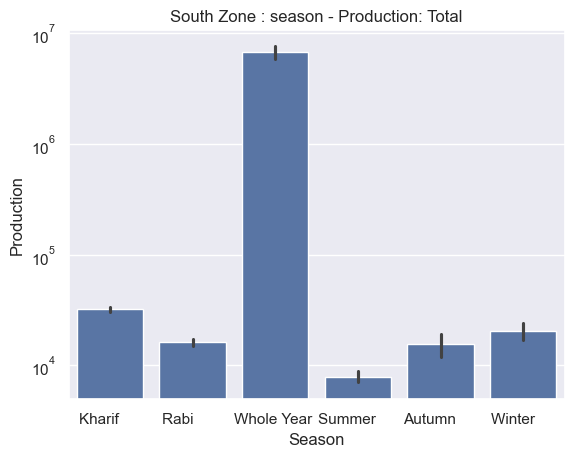

In [154]:
sns.barplot(x = south_zone['Season'] ,y= south_zone["Production"])#, orient='h')
plt.yscale('log')
plt.title('South Zone : season - Production: Total')

In [155]:
north_zone =  data[(data["Zones"] == 'North Zone')]
north_zone

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,Crop_type
65596,Haryana,AMBALA,1997,Kharif,Bajra,1000.0,1000.0,North Zone,Cereal
65597,Haryana,AMBALA,1997,Kharif,Maize,8000.0,15000.0,North Zone,Cereal
65598,Haryana,AMBALA,1997,Kharif,Other Kharif pulses,1000.0,600.0,North Zone,Pulses
65599,Haryana,AMBALA,1997,Kharif,Rice,65000.0,182000.0,North Zone,Cereal
65600,Haryana,AMBALA,1997,Rabi,Other Rabi pulses,25000.0,18000.0,North Zone,Pulses
...,...,...,...,...,...,...,...,...,...
176949,Rajasthan,UDAIPUR,2010,Whole Year,Onion,15.0,36.0,North Zone,Vegetables
176950,Rajasthan,UDAIPUR,2010,Whole Year,Potato,3.0,7.0,North Zone,Vegetables
176951,Rajasthan,UDAIPUR,2010,Whole Year,Sannhamp,60.0,56.0,North Zone,fibres
176952,Rajasthan,UDAIPUR,2010,Whole Year,Sugarcane,293.0,16859.0,North Zone,Commercial


In [156]:
dfn = north_zone.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)

Text(0.5, 1.0, 'North Zone: State_ name vs Production')

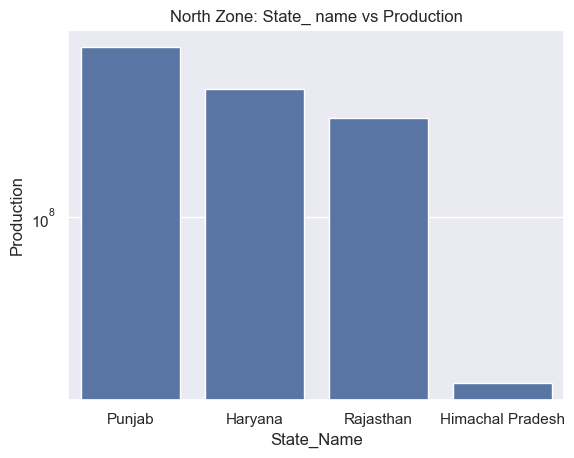

In [157]:
sns.barplot(x = dfn['State_Name'] ,y= dfn["Production"])#, orient='h')
plt.yscale('log')
plt.title('North Zone: State_ name vs Production')

###### Data representation based on District name
* From the district 
* Here one state is selected from the zone and based on crop type

In [158]:
df_k = south_zone[(south_zone["State_Name"] == 'Kerala') & (south_zone['Crop_type'] == "Cereal")]
df_k

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,Crop_type
97992,Kerala,ALAPPUZHA,1998,Autumn,Rice,8719.0,17570.0,South Zone,Cereal
97994,Kerala,ALAPPUZHA,1998,Summer,Rice,19058.0,58013.0,South Zone,Cereal
98005,Kerala,ALAPPUZHA,1998,Winter,Rice,7348.0,16098.0,South Zone,Cereal
98006,Kerala,ALAPPUZHA,1999,Autumn,Rice,8233.0,24776.0,South Zone,Cereal
98008,Kerala,ALAPPUZHA,1999,Summer,Rice,16404.0,39718.0,South Zone,Cereal
...,...,...,...,...,...,...,...,...,...
102212,Kerala,WAYANAD,2013,Summer,Rice,1522.0,4062.0,South Zone,Cereal
102223,Kerala,WAYANAD,2013,Whole Year,Jowar,4.0,3.0,South Zone,Cereal
102230,Kerala,WAYANAD,2013,Winter,Rice,9959.0,26693.0,South Zone,Cereal
102231,Kerala,WAYANAD,2014,Summer,Rice,1039.0,2844.0,South Zone,Cereal


In [159]:
dfs_k = df_k.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)
dfs_k

,Crop,Production
4,Rice,10593347.58
0,Jowar,14411.00
3,Ragi,10183.00
2,Other Cereals & Millets,1989.00
5,Small millets,1077.00
1,Maize,155.00
6,Wheat,3.00


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Rice'),
  Text(1, 0, 'Jowar'),
  Text(2, 0, 'Ragi'),
  Text(3, 0, 'Other Cereals & Millets'),
  Text(4, 0, 'Small millets'),
  Text(5, 0, 'Maize'),
  Text(6, 0, 'Wheat')])

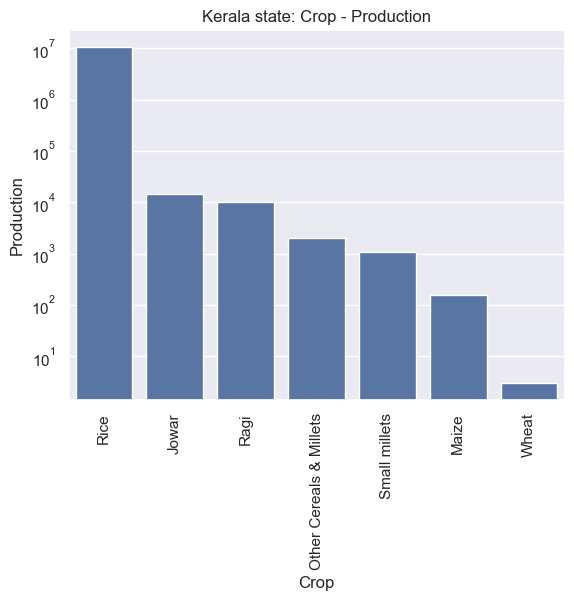

In [160]:
sns.barplot(x = dfs_k['Crop'] ,y= dfs_k["Production"])#, orient='h')
plt.yscale('log')
plt.title('Kerala state: Crop - Production')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'ALAPPUZHA'),
  Text(1, 0, 'ERNAKULAM'),
  Text(2, 0, 'IDUKKI'),
  Text(3, 0, 'KANNUR'),
  Text(4, 0, 'KASARAGOD'),
  Text(5, 0, 'KOLLAM'),
  Text(6, 0, 'KOTTAYAM'),
  Text(7, 0, 'KOZHIKODE'),
  Text(8, 0, 'MALAPPURAM'),
  Text(9, 0, 'PALAKKAD'),
  Text(10, 0, 'PATHANAMTHITTA'),
  Text(11, 0, 'THIRUVANANTHAPURAM'),
  Text(12, 0, 'THRISSUR'),
  Text(13, 0, 'WAYANAD')])

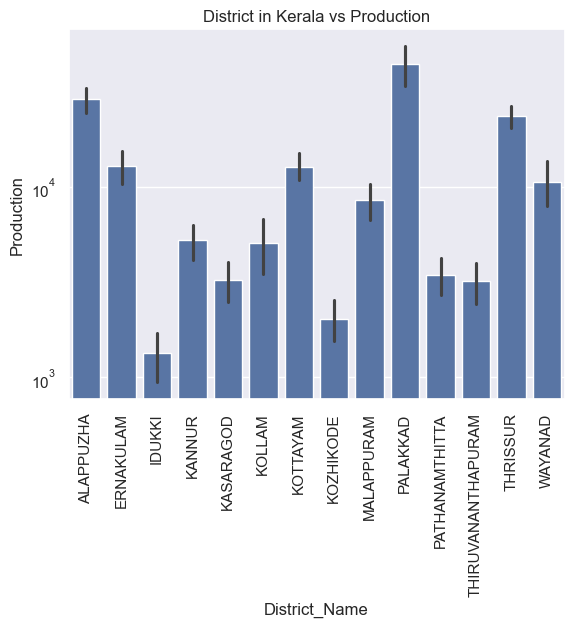

In [161]:
sns.barplot(x = df_k['District_Name'] ,y= df_k["Production"])#, orient='h')
plt.yscale('log')
plt.title('District in Kerala vs Production')
plt.xticks(rotation=90)

In [162]:
dis_k = df_k[df_k['District_Name'] == 'PALAKKAD'] 
dis_k

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,Crop_type
100712,Kerala,PALAKKAD,1998,Autumn,Rice,45915.0,98955.0,South Zone,Cereal
100715,Kerala,PALAKKAD,1998,Kharif,Jowar,2175.0,1107.0,South Zone,Cereal
100716,Kerala,PALAKKAD,1998,Kharif,Ragi,1115.0,902.0,South Zone,Cereal
100718,Kerala,PALAKKAD,1998,Summer,Rice,5822.0,15619.0,South Zone,Cereal
100731,Kerala,PALAKKAD,1998,Winter,Rice,55730.0,123214.0,South Zone,Cereal
...,...,...,...,...,...,...,...,...,...
101085,Kerala,PALAKKAD,2014,Whole Year,Jowar,173.0,128.0,South Zone,Cereal
101086,Kerala,PALAKKAD,2014,Whole Year,Maize,64.0,64.0,South Zone,Cereal
101090,Kerala,PALAKKAD,2014,Whole Year,Ragi,77.0,76.0,South Zone,Cereal
101092,Kerala,PALAKKAD,2014,Whole Year,Small millets,27.0,21.0,South Zone,Cereal


Text(0.5, 1.0, 'District wise (Palakkad) : Area vs Production')

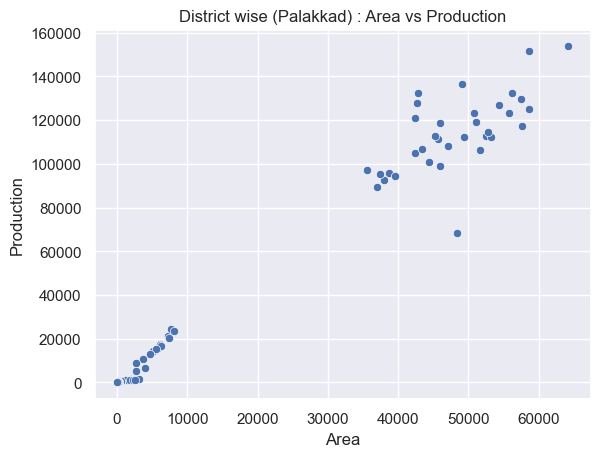

In [163]:
sns.scatterplot(x = dis_k['Area'] ,y= dis_k["Production"])#, orient='h')

plt.title('District wise (Palakkad) : Area vs Production')

From the above graph, we can clearly see that the area and production are dependent on each other, as the area increases production as well.

        Season  Production
4  Winter       2040221.86
0  Autumn       1834104.32
2  Summer        232949.95
1  Kharif         26098.00
3  Whole Year       898.00


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Winter     '),
  Text(1, 0, 'Autumn     '),
  Text(2, 0, 'Summer     '),
  Text(3, 0, 'Kharif     '),
  Text(4, 0, 'Whole Year ')])

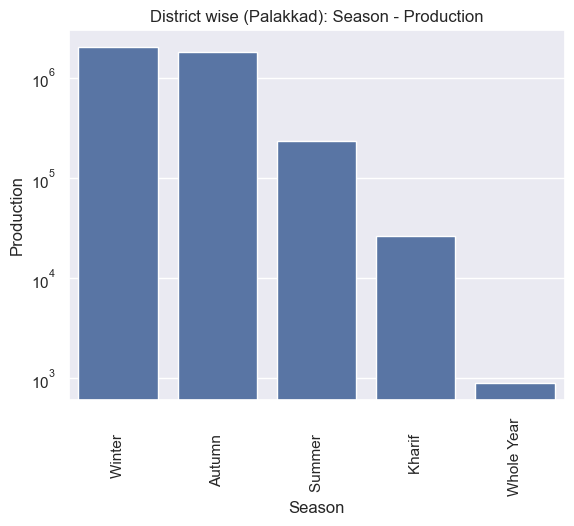

In [164]:
dis_k_s = dis_k.groupby(by='Season')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)
print(dis_k_s)
sns.barplot(x = dis_k_s['Season'] ,y= dis_k_s["Production"])
plt.yscale('log')
plt.title('District wise (Palakkad): Season - Production')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Rice'),
  Text(1, 0, 'Jowar'),
  Text(2, 0, 'Ragi'),
  Text(3, 0, 'Other Cereals & Millets'),
  Text(4, 0, 'Small millets'),
  Text(5, 0, 'Maize')])

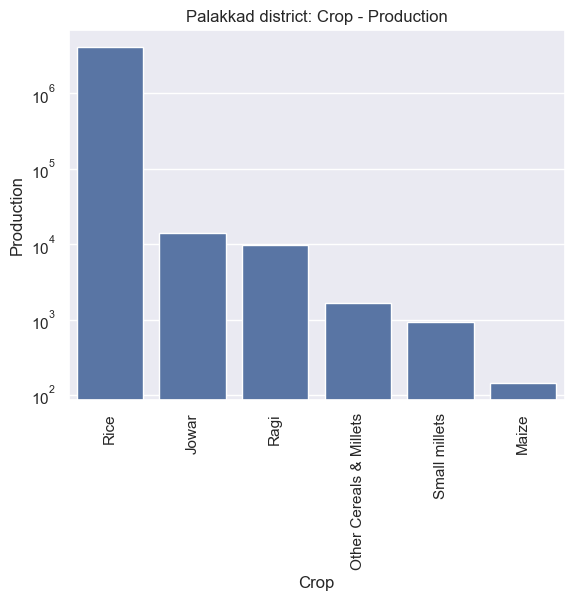

In [165]:
dis_kp = dis_k.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)
# dis_kp
sns.barplot(x = dis_kp['Crop'] ,y= dis_kp["Production"])#, orient='h')
plt.yscale('log')
plt.title('Palakkad district: Crop - Production')
plt.xticks(rotation=90)

In [166]:
df_p = north_zone[(north_zone["State_Name"] == 'Punjab') & (north_zone['Crop_type'] == "Cereal")]
df_p

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,Crop_type
161268,Punjab,AMRITSAR,1997,Kharif,Bajra,1000.0,1000.0,North Zone,Cereal
161269,Punjab,AMRITSAR,1997,Kharif,Maize,7000.0,14000.0,North Zone,Cereal
161270,Punjab,AMRITSAR,1997,Kharif,Rice,292000.0,879000.0,North Zone,Cereal
161276,Punjab,AMRITSAR,1997,Rabi,Wheat,349000.0,1318000.0,North Zone,Cereal
161282,Punjab,AMRITSAR,1998,Kharif,Maize,6000.0,14000.0,North Zone,Cereal
...,...,...,...,...,...,...,...,...,...
164427,Punjab,TARN TARAN,2013,Kharif,Maize,1000.0,4000.0,North Zone,Cereal
164429,Punjab,TARN TARAN,2013,Kharif,Rice,177000.0,594000.0,North Zone,Cereal
164433,Punjab,TARN TARAN,2013,Rabi,Wheat,183000.0,931000.0,North Zone,Cereal
164437,Punjab,TARN TARAN,2014,Kharif,Rice,176000.0,540000.0,North Zone,Cereal


In [167]:
dfn_p = df_p.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)
dfn_p

,Crop,Production
5,Wheat,276946000.0
4,Rice,179702000.0
3,Maize,8052000.0
1,Barley,1249400.0
0,Bajra,75800.0
2,Jowar,400.0


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Wheat'),
  Text(1, 0, 'Rice'),
  Text(2, 0, 'Maize'),
  Text(3, 0, 'Barley'),
  Text(4, 0, 'Bajra'),
  Text(5, 0, 'Jowar')])

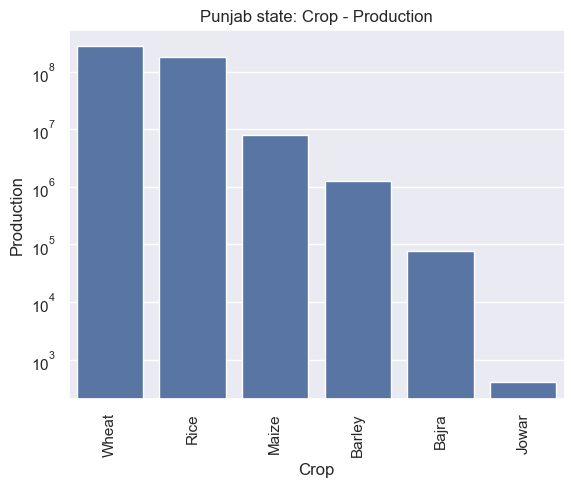

In [168]:
sns.barplot(x = dfn_p['Crop'] ,y= dfn_p["Production"])#, orient='h')
plt.yscale('log')
plt.title('Punjab state: Crop - Production')
plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'AMRITSAR'),
  Text(1, 0, 'BARNALA'),
  Text(2, 0, 'BATHINDA'),
  Text(3, 0, 'FARIDKOT'),
  Text(4, 0, 'FATEHGARH SAHIB'),
  Text(5, 0, 'FAZILKA'),
  Text(6, 0, 'FIROZEPUR'),
  Text(7, 0, 'GURDASPUR'),
  Text(8, 0, 'HOSHIARPUR'),
  Text(9, 0, 'JALANDHAR'),
  Text(10, 0, 'KAPURTHALA'),
  Text(11, 0, 'LUDHIANA'),
  Text(12, 0, 'MANSA'),
  Text(13, 0, 'MOGA'),
  Text(14, 0, 'MUKTSAR'),
  Text(15, 0, 'NAWANSHAHR'),
  Text(16, 0, 'PATHANKOT'),
  Text(17, 0, 'PATIALA'),
  Text(18, 0, 'RUPNAGAR'),
  Text(19, 0, 'S.A.S NAGAR'),
  Text(20, 0, 'SANGRUR'),
  Text(21, 0, 'TARN TARAN')])

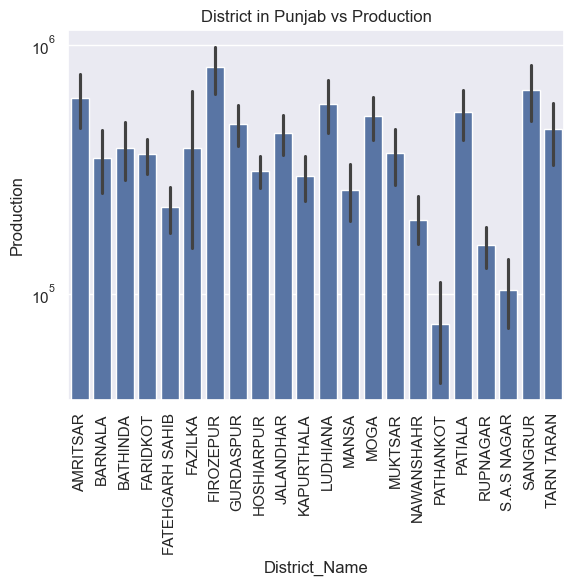

In [169]:
sns.barplot(x = df_p['District_Name'] ,y= df_p["Production"])#, orient='h')
plt.yscale('log')
plt.title('District in Punjab vs Production')
plt.xticks(rotation=90)

In [170]:
dis_F = df_p[df_p['District_Name'] == 'FIROZEPUR'] 
# dis_F

Text(0.5, 1.0, 'District wise (Firozepur) : Area vs Production')

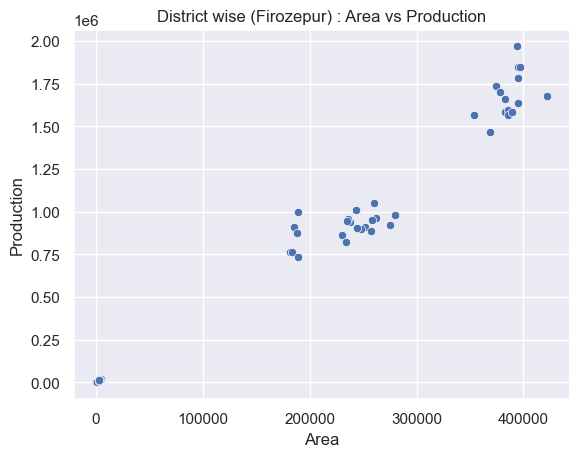

In [171]:
sns.scatterplot(x = dis_F['Area'] ,y= dis_F["Production"])#, orient='h')

plt.title('District wise (Firozepur) : Area vs Production')


From the above graph, we can clearly see that the area and production are dependent on each other, as the area increases production as well.

        Season  Production
1  Rabi         28229000.0
0  Kharif       16282400.0


([0, 1], [Text(0, 0, 'Rabi       '), Text(1, 0, 'Kharif     ')])

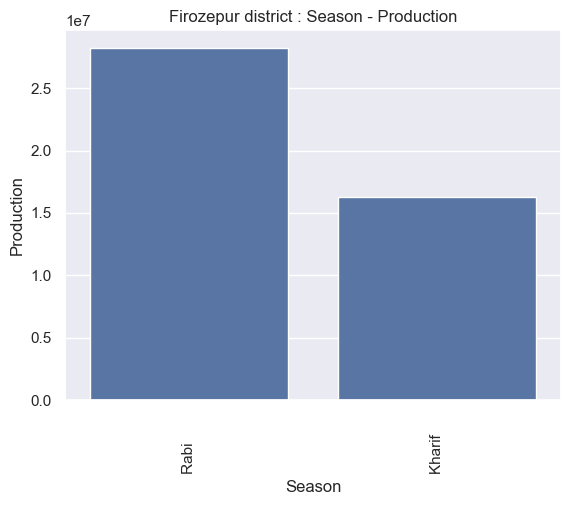

In [172]:
dis_PF_s = dis_F.groupby(by='Season')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)
print(dis_PF_s)
sns.barplot(x = dis_PF_s['Season'] ,y= dis_PF_s["Production"])#, orient='h')
# plt.yscale('log')
plt.title('Firozepur district : Season - Production')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Wheat'),
  Text(1, 0, 'Rice'),
  Text(2, 0, 'Barley'),
  Text(3, 0, 'Bajra'),
  Text(4, 0, 'Jowar')])

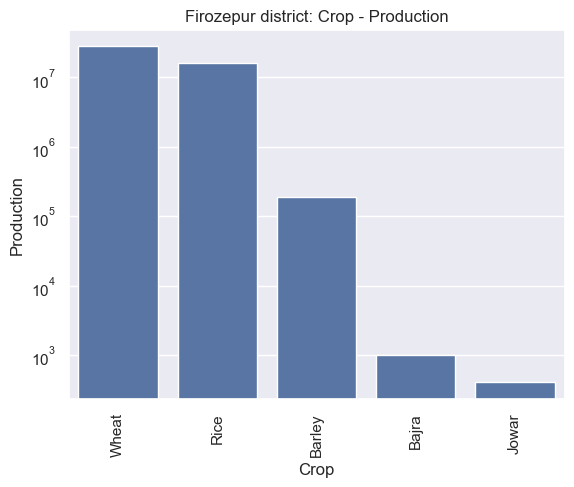

In [173]:
dis_PF = dis_F.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)
# dis_P
sns.barplot(x = dis_PF['Crop'] ,y= dis_PF["Production"])#, orient='h')
plt.yscale('log')
plt.title('Firozepur district: Crop - Production')
plt.xticks(rotation=90)

## Conclusions: 

* Crop production from 1997 to 2015 can be examined.
* We may use basic visualisations to gain an idea of the distribution of data based on the provided data.
* We only need to subset data sets according to state name, district name and crops type to do basic analyses.
* Area, Season and zone (state, district) all have a significant impact on agricultural yield.
* Analyses how different crops are produced in India's zones as well as how crop output is impacted by zone-specific seasons.